# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

# import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load data

In [ ]:
dataset = pd.read_csv("car_data.csv", delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

In [3]:
data.shape, target.shape

((846, 19), (846,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((549, 19), (549,), (297, 19), (297,))

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# Перве 10 строк набора данных
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,684,99,38,74,184,66,6,164,39,20,131,193,414,137,71,2,22,200,202
1,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202
2,724,94,45,85,160,63,10,158,43,20,157,174,367,162,68,1,6,189,199
3,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
4,151,94,44,84,216,74,6,184,35,22,145,208,525,154,73,4,22,196,197


Methods `describe` and `info` deliver some useful information.

In [6]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000
mean,426.318761,94.030965,45.167577,82.766849,169.338798,61.426230,8.510018,170.240437,40.648452,20.692168,148.710383,189.748634,447.743169,176.413479,72.32969,6.595628,12.446266,189.020036,195.781421
std,239.153416,8.378421,6.289051,16.044655,32.613278,7.268854,4.236441,34.025384,7.925883,2.658472,14.657212,31.776860,181.606692,33.759539,7.13444,4.997121,8.764525,6.186691,7.412725
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.00000,0.000000,0.000000,176.000000,181.000000
25%,221.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,150.000000,67.00000,3.000000,5.000000,185.000000,191.000000
50%,428.000000,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,147.000000,179.000000,367.000000,176.000000,71.00000,6.000000,11.000000,189.000000,197.000000
75%,628.000000,100.000000,51.000000,98.000000,196.000000,65.000000,10.000000,201.000000,46.000000,23.000000,161.000000,219.000000,611.000000,200.000000,75.00000,10.000000,18.000000,193.000000,201.000000
max,843.000000,119.000000,59.000000,112.000000,306.000000,126.000000,55.000000,261.000000,61.000000,28.000000,188.000000,288.000000,998.000000,268.000000,119.00000,22.000000,41.000000,206.000000,211.000000


In [7]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
# Загрузим набор данных
car_data = pd.read_csv(r"https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv")
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       845 non-null    int64 
 1   95      845 non-null    int64 
 2   48      845 non-null    int64 
 3   83      845 non-null    int64 
 4   178     845 non-null    int64 
 5   72      845 non-null    int64 
 6   10      845 non-null    int64 
 7   162     845 non-null    int64 
 8   42      845 non-null    int64 
 9   20      845 non-null    int64 
 10  159     845 non-null    int64 
 11  176     845 non-null    int64 
 12  379     845 non-null    int64 
 13  184     845 non-null    int64 
 14  70      845 non-null    int64 
 15  6       845 non-null    int64 
 16  16      845 non-null    int64 
 17  187     845 non-null    int64 
 18  197     845 non-null    int64 
 19  van     845 non-null    object
dtypes: int64(19), object(1)
memory usage: 132.2+ KB


In [ ]:
# Столбцы
new_column_names = [
    "ID", "COMPACTNESS", "CIRCULARITY", "DISTANCE CIRCULARITY", "RADIUS RATIO", 
    "PRAXIS ASPECT RATIO", "MAXLENGTH ASPECT RATIO", "SCATTER RATIO", 
    "ELONGATEDNESS", "PRAXIS RECTANGULARITY", "MAXLENGTH RECTANGULARITY", 
    "SCALED VARIANCE ALONG MAJOR AXIS", "SCALED VARIANCE ALONG MINOR AXIS", 
    "SCALED RADIUS OF GYRATION", "SKEWNESS ABOUT MAJOR AXIS", "SKEWNESS ABOUT MINOR AXIS", 
    "KURTOSIS ABOUT MINOR AXIS", "KURTOSIS ABOUT MAJOR AXIS", "HOLLOWS RATIO", 
    "CLASS LABEL"
]

car_data.columns = new_column_names

# Кодирование
car_data['CLASS LABEL'] = car_data['CLASS LABEL'].astype('category').cat.codes


In [10]:
car_data.head()

,ID,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PRAXIS ASPECT RATIO,MAXLENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PRAXIS RECTANGULARITY,MAXLENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,CLASS LABEL
0,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
1,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
2,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
3,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0
4,5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,0


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
# Импорт библиотек
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


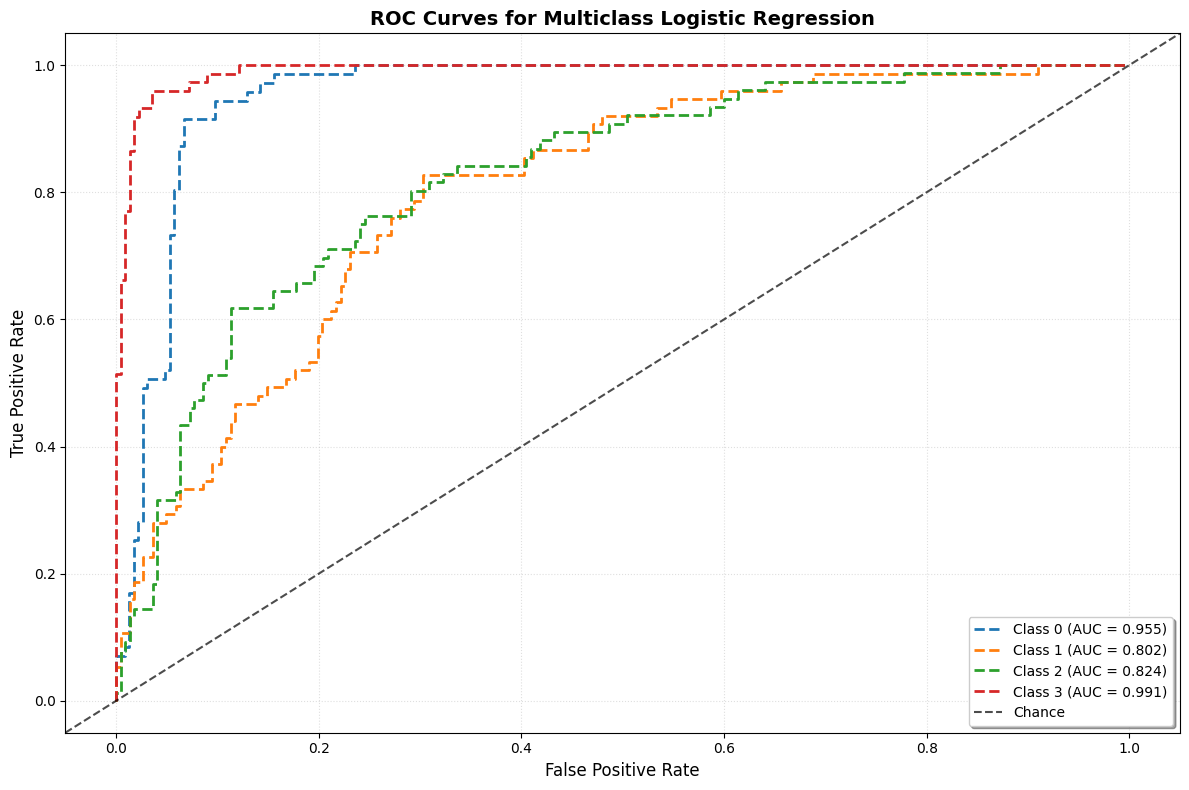

(0.7094594594594594, 0.7094594594594594, {'C': 0.1})

In [ ]:
# Разделение данных на функции и цели
X = car_data.drop(columns=['ID', 'CLASS LABEL'])
y = car_data['CLASS LABEL']

# Train-test разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Настройка логистической регрессии с полиномиальной опцией
logistic_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# Сетка настройки гиперпараметров
hyperparameter_grid = {
    'C': [0.1, 1, 10]
}

# GridSearchCV для оптимизации гиперпараметров
cv_search = GridSearchCV(estimator=logistic_model, param_grid=hyperparameter_grid, cv=5, scoring='f1_micro', n_jobs=-1)
cv_search.fit(X_train, y_train)

# Получим лучшую модель
optimal_model = cv_search.best_estimator_

# Оценим модель на тестовом наборе
y_test_predictions = optimal_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_predictions)
test_f1_score = f1_score(y_test, y_test_predictions, average='micro')

# Преобразование меток в двоичный формат для построения кривой ROC
y_test_binary = label_binarize(y_test, classes=list(range(len(y.unique()))))
y_pred_probabilities = optimal_model.predict_proba(X_test)

# Построим кривые ROC для каждого класса с обновленными настройками
plt.figure(figsize=(12, 8))
plt.grid(alpha=0.4, linestyle=':')

for class_index in range(y_test_binary.shape[1]):
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test_binary[:, class_index], y_pred_probabilities[:, class_index])
    auc_score = roc_auc_score(y_test_binary[:, class_index], y_pred_probabilities[:, class_index])
    plt.plot(false_positive_rate, true_positive_rate, label=f'Class {class_index} (AUC = {auc_score:.3f})', linewidth=2, linestyle='--')

plt.axline((0, 0), slope=1, color='black', linestyle='--', alpha=0.7, label="Chance")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curves for Multiclass Logistic Regression", fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10, frameon=True, shadow=True)
plt.tight_layout()
plt.show()

# Точность вывода, оценка F1 и лучшие параметры
test_accuracy, test_f1_score, cv_search.best_params_



#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

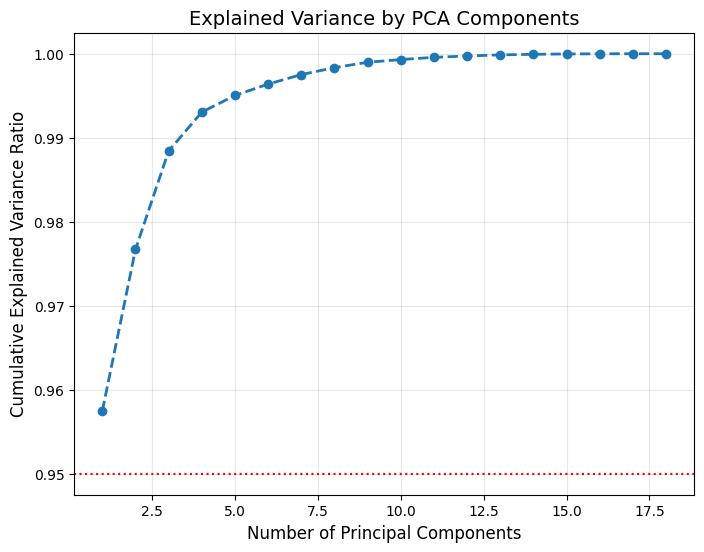

In [ ]:
from sklearn.decomposition import PCA

# инициализируем PCA и адаптируем его к обучающим данным
pca_model = PCA()
pca_model.fit(X_train)

# Построим совокупный коэффициент объясненной дисперсии со скорректированными настройками
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.plot(range(1, len(pca_model.explained_variance_ratio_) + 1), 
         pca_model.explained_variance_ratio_.cumsum(), 
         marker='o', linestyle='--', linewidth=2)
plt.axhline(y=0.95, color='red', linestyle=':')
plt.grid(alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance by PCA Components', fontsize=14)
plt.show()


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
# Выберем количество главных компонентов на основе объясненного графика отклонения
pca = PCA(n_components=6)  # выберем 6 компонентов

# Применим PCA к наборам данных обучения и тестирования
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


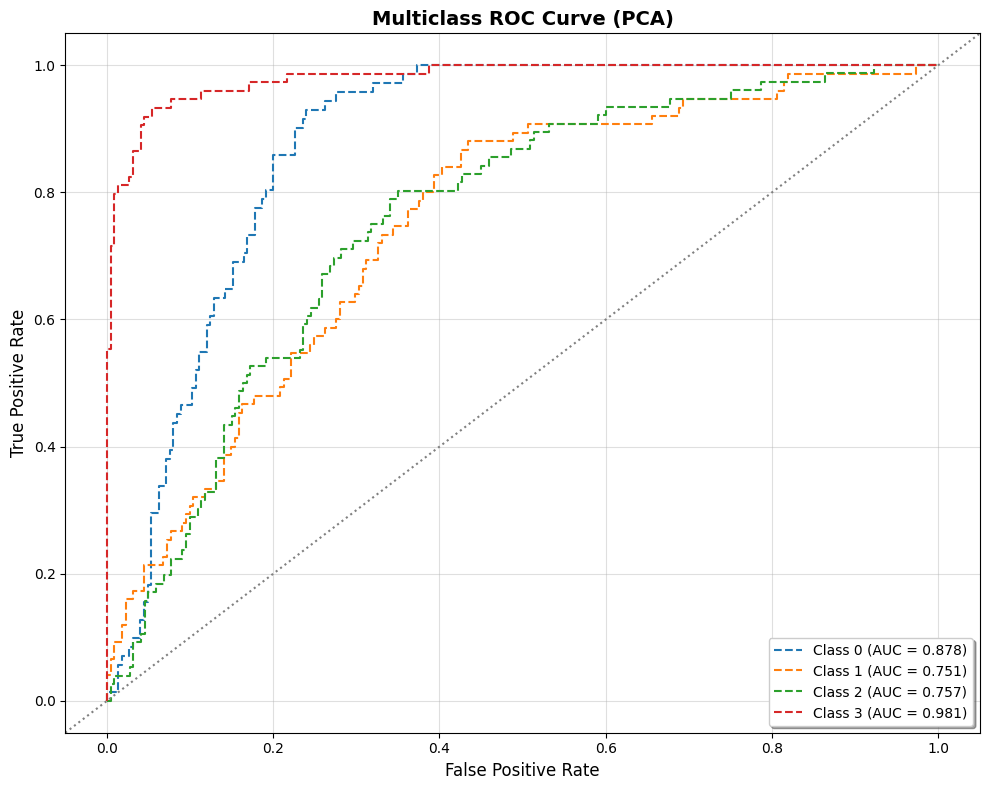

(0.5574324324324325, 0.5574324324324325, {'C': 0.1})

In [ ]:
from sklearn.preprocessing import label_binarize

# Бинаризация тестовых меток для многоклассоввой кривой ROC
y_test_binarized = label_binarize(y_test, classes=list(range(len(np.unique(y_train)))

# Инициализируем логистическую регрессию с указанными параметрами
logistic_pca_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# Поиск по сетке для настройки гиперпараметров данных, преобразованных PCA
hyperparameter_grid_pca = {
    'C': [0.1, 1, 10]
}
grid_search_pca = GridSearchCV(estimator=logistic_pca_model, param_grid=hyperparameter_grid_pca, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search_pca.fit(X_train_pca, y_train)

# Оценим модель на тестовых данных
y_predictions_pca = grid_search_pca.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, y_predictions_pca)
pca_f1_score = f1_score(y_test, y_predictions_pca, average='micro')

# Построим кривые ROC для логистической регрессии, преобразованной PCA, с пользовательскими настройками
probabilities_pca = grid_search_pca.predict_proba(X_test_pca)
plt.figure(figsize=(10, 8))
plt.grid(alpha=0.4)

for class_idx in range(y_test_binary.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binary[:, class_idx], probabilities_pca[:, class_idx])
    auc_score = roc_auc_score(y_test_binary[:, class_idx], probabilities_pca[:, class_idx])
    plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {auc_score:.3f})', linestyle='--', linewidth=1.5)

plt.axline((0, 0), slope=1, color='gray', linestyle=':')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Multiclass ROC Curve (PCA)", fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10, frameon=True, shadow=True)
plt.tight_layout()
plt.show()

# Вывод результата
print(f"PCA Logistic Regression Accuracy: {pca_accuracy:.3f}")
print(f"PCA Logistic Regression F1 Score: {pca_f1_score:.3f}")
print(f"Best Hyperparameters: {grid_search_pca.best_params_}")



#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель дерева решений
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Определим сетку для настройки гиперпараметров (максимальная глубина дерева)
hyperparameter_grid_tree = {
    'max_depth': [3, 6, 10, 15, 20]
}

# Выполним поиск по сетке с перекрестной проверкой
grid_search_tree = GridSearchCV(estimator=decision_tree_model, param_grid=hyperparameter_grid_tree, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Оценим модель на тестовом наборе
tree_predictions = grid_search_tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_f1_score = f1_score(y_test, tree_predictions, average='micro')

# Вывод результатов
tree_accuracy, tree_f1_score, grid_search_tree.best_params_

(0.6722972972972973, 0.6722972972972973, {'max_depth': 6})

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\P

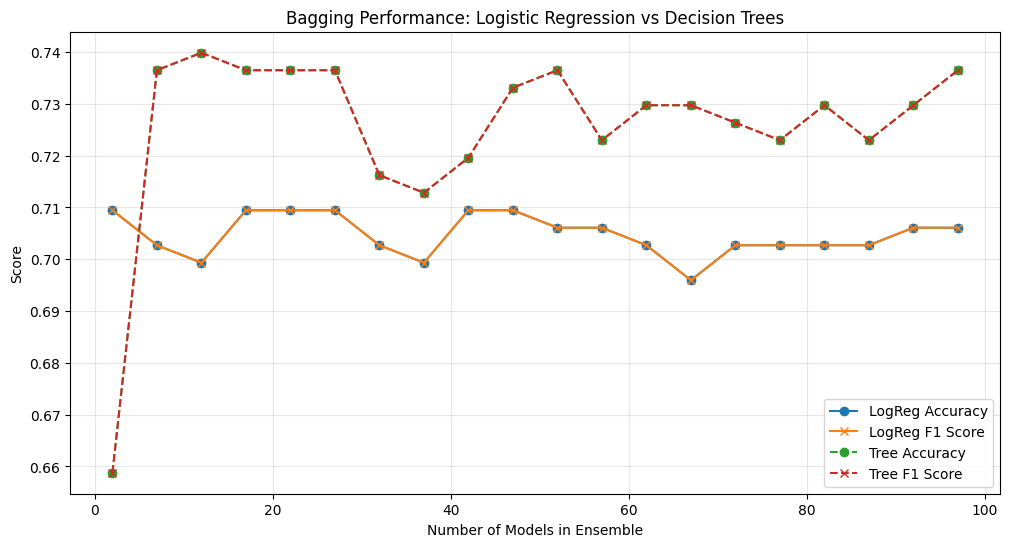

Optimal number of estimators for Logistic Regression: 2


In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Инициализируем модель логистической регрессии
best_log_reg = LogisticRegression(multi_class='multinomial', solver='saga', C=1, max_iter=500, random_state=42)

# Инициализируем модель дерева решений с оптимальными гиперпараметрами
best_decision_tree = DecisionTreeClassifier(max_depth=10, random_state=42)

# Установим базовые модели, чтобы избежать проблем при обучении
best_log_reg.fit(X_train, y_train)
best_decision_tree.fit(X_train, y_train)

# Определим диапозон количества моделей в ансабле
n_estimators_range = range(2, 101, 5)

# Сохраним результаты
log_reg_scores = {'accuracy': [], 'f1': []}
tree_scores = {'accuracy': [], 'f1': []}

# Оценка логистической регресии для ансаблей разных размеров
for n_estimators in n_estimators_range:
    # Упаковка логистической регрессии
    bagging_log_reg = BaggingClassifier(estimator=best_log_reg, n_estimators=n_estimators, random_state=42, n_jobs=-1)
    bagging_log_reg.fit(X_train, y_train)
    y_pred_log_reg = bagging_log_reg.predict(X_test)
    log_reg_scores['accuracy'].append(accuracy_score(y_test, y_pred_log_reg))
    log_reg_scores['f1'].append(f1_score(y_test, y_pred_log_reg, average='micro'))

    # Упаковка дерева решений
    bagging_tree = BaggingClassifier(estimator=best_decision_tree, n_estimators=n_estimators, random_state=42, n_jobs=-1)
    bagging_tree.fit(X_train, y_train)
    y_pred_tree = bagging_tree.predict(X_test)
    tree_scores['accuracy'].append(accuracy_score(y_test, y_pred_tree))
    tree_scores['f1'].append(f1_score(y_test, y_pred_tree, average='micro'))

# Построим график результатов
plt.figure(figsize=(12, 6))

# Оценка логистической регрессии
plt.plot(n_estimators_range, log_reg_scores['accuracy'], label='LogReg Accuracy', marker='o')
plt.plot(n_estimators_range, log_reg_scores['f1'], label='LogReg F1 Score', marker='x')

# Оценка дерева решений
plt.plot(n_estimators_range, tree_scores['accuracy'], label='Tree Accuracy', marker='o', linestyle='--')
plt.plot(n_estimators_range, tree_scores['f1'], label='Tree F1 Score', marker='x', linestyle='--')

plt.xlabel('Number of Models in Ensemble')
plt.ylabel('Score')
plt.title('Bagging Performance: Logistic Regression vs Decision Trees')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Анализ результатов
optimal_n_estimators_log_reg = n_estimators_range[np.argmax(log_reg_scores['f1'])]
optimal_n_estimators_tree = n_estimators_range[np.argmax(tree_scores['f1'])]
print(f"Optimal number of estimators for Logistic Regression: {optimal_n_estimators_log_reg}")
print(f"Optimal number of estimators for Decision Tree: {optimal_n_estimators_tree}")


Оптимальное количество алгоритмов в ансамбле:

Судя по графику, оптимальное количество оценок для логистической регрессии равно 2, поскольку оценка F1 достигает максимального значения при таком количестве моделей. Добавление большего количества оценщиков не приводит к существенному улучшению или стабилизации производительности, вероятно, из-за уменьшения отдачи от дополнительных членов ансамбля.

Почему оптимальное количество оценщиков невелико:

Логистическая регрессия в качестве базовой модели относительно проста и хорошо работает с меньшим количеством членов ансамбля. Упаковка в пакеты может не дать значительных улучшений для небольших наборов данных или менее сложных задач, поскольку отдельные модели логистической регрессии уже собирают большую часть информации.

Гиперпараметры для деревьев решений в ансамбле:

Оптимальные гиперпараметры для деревьев решений (например, максимальная глубина) из предыдущего процесса настройки остаются подходящими для ансамбля. Ожидается, что эти деревья будут дополнять друг друга в ансамбле, уменьшая дисперсию без необходимости дополнительной настройки, особенно когда ансамбль достаточно велик.

Деревья решений против логистической регрессии в ансамбле:

Деревья решений получают больше преимуществ от ансамблевых методов, таких как пакетирование, поскольку они более склонны к переобучению в качестве отдельных моделей. Ансамбль помогает уменьшить переобучение за счет усреднения прогнозов по нескольким деревьям. Модели логистической регрессии, будучи по своей сути менее сложными, показывают менее выраженные улучшения в сценариях упаковки.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

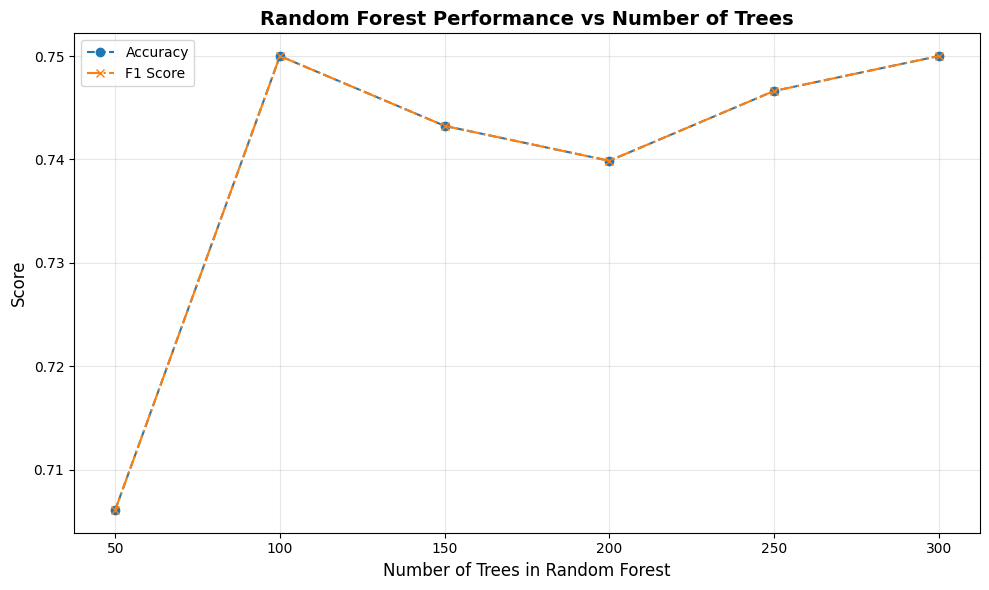

Optimal number of trees: 100
Accuracy: 0.75, F1 Score: 0.75


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Инициализируем модель случайного леса
rf_clf = RandomForestClassifier(random_state=42)

# Диапозон количества деревьев в случайном лесу
n_estimators_range = [50, 100, 150, 200, 250, 300]

rf_scores = {'accuracy': [], 'f1': []}

# Оценим случайный лес для разного количества деревьев
for n_estimators in n_estimators_range:
    # Установим количество деревьев и подгоним модель
    rf_clf.set_params(n_estimators=n_estimators)
    rf_clf.fit(X_train, y_train)
    
    # Прогнозирование на тестовом наборе
    y_pred_rf = rf_clf.predict(X_test)
    
    # Рассчитаем точность и баллы F1
    rf_scores['accuracy'].append(accuracy_score(y_test, y_pred_rf))
    rf_scores['f1'].append(f1_score(y_test, y_pred_rf, average='micro'))

# Построим график результатов
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, rf_scores['accuracy'], label='Accuracy', marker='o', linestyle='--')
plt.plot(n_estimators_range, rf_scores['f1'], label='F1 Score', marker='x', linestyle='-.')

plt.xlabel('Number of Trees in Random Forest', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Random Forest Performance vs Number of Trees', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Найдем оптимальное количество деревьев
optimal_n_trees = n_estimators_range[rf_scores['f1'].index(max(rf_scores['f1']))]
print(f"Optimal number of trees: {optimal_n_trees}")

# Выведим окончательные метрики для оптимального количества деревьев
accuracy_rf = max(rf_scores['accuracy'])
f1_rf = max(rf_scores['f1'])
print(f"Accuracy: {accuracy_rf}, F1 Score: {f1_rf}")


1. Оптимальное количество деревьев

Судя по графику, оптимальное количество деревьев для случайного леса составляет 100, при этом точность и показатель F1 достигают максимального значения 0,75.
После этого момента производительность стабилизируется без существенного улучшения показателей для большего количества деревьев. Небольшие отклонения, вероятно, обусловлены эффектами случайной выборки.

2. Сравнение с логистической регрессией и деревьями решений

Оптимальное количество моделей для логистической регрессии в ансамбле было 2, а для деревьев решений — выше.
Случайный лес по своей сути использует несколько деревьев, и оптимальное значение здесь составляет 100 деревьев, что соответствует необходимости в более сложных ансамблях при использовании модели на основе дерева решений. Случайный лес выигрывает от большего количества оценщиков по сравнению с более простым ансамблем логистической регрессии с пакетами из-за дополнительной случайности функций при построении дерева.

3. Аргументация различий

Логистическая регрессия представляет собой линейную модель и требует меньшего количества базовых моделей для хорошего обобщения, поскольку каждая модель в ансамбле непосредственно способствует улучшению линейной границы.
Деревья решений склонны к переоснащению, но эффективно отражают нелинейные отношения. В случайном лесу агрегирование нескольких деревьев (наряду со случайностью признаков) значительно улучшает обобщение, требуя большего количества деревьев для оптимального баланса между смещением и дисперсией.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached whic

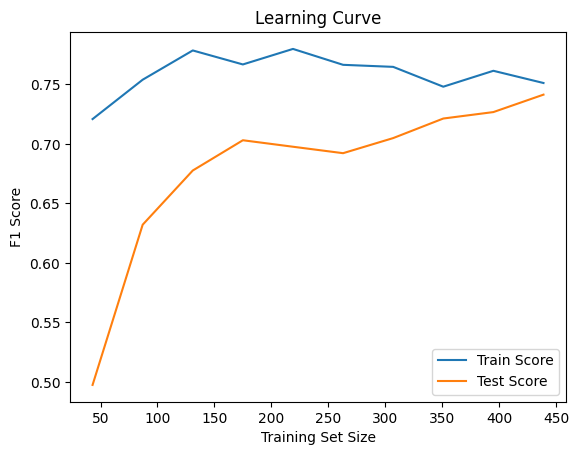

In [ ]:
from sklearn.model_selection import learning_curve

# Используем функцию learning_curve для логистической регрессии

train_sizes, train_scores, test_scores = learning_curve(best_log_reg, X_train, y_train, cv=5, scoring='f1_micro', train_sizes=np.linspace(0.1, 1.0, 10))

# Построим кривую обучения

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


Объяснение:


Оценка обучения: Оценка обучения (синяя линия) постоянно высока, что свидетельствует о том, что модель хорошо обучается на данных обучения с минимальной ошибкой.
Оценка теста: Оценка теста (оранжевая линия) начинается с более низкого уровня, но увеличивается по мере увеличения размера набора обучающих данных. Это указывает на то, что модель лучше обобщает, поскольку для обучения используется больше данных.


Наблюдения:


Разрыв между результатами обучения и тестирования: Заметный разрыв между результатами обучения и тестирования предполагает небольшое переоснащение, особенно когда объем обучения невелик.
Точка насыщения: Результаты обучения и тестов выходят на плато, когда размер набора обучающих данных приближается к максимальному. Это говорит о том, что добавление большего количества данных не может существенно улучшить производительность модели.


Выводы:


Обобщение модели: Модель лучше обобщается при увеличении объема обучающих данных, что уменьшает переобучение.
Оптимальный размер данных: Использование не менее 70–80 % набора данных для обучения приводит к стабильной производительности как для обучения, так и для тестов.
Дальнейшие улучшения: Чтобы сократить разрыв между результатами обучения и тестирования, можно применить регуляризацию или настройку гиперпараметров.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [ ]:
from xgboost import XGBClassifier

# Инициализируем классификатор XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Определим сетку гиперпараметров
xgb_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

# Выполним поиск по сетке с перекрестной проверкой
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Оценим модель на тестовом наборе
xgb_predictions = grid_search_xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_f1_score = f1_score(y_test, xgb_predictions, average='micro')

# Вывод результатов
xgb_accuracy, xgb_f1_score, grid_search_xgb.best_params_


(0.7567567567567568,
 0.7567567567567568,
 {'learning_rate': 0.3, 'n_estimators': 50})


Определены оптимальные параметры:

На основании результатов поиска по сетке лучшими параметрами для модели XGBoost являются:
Скорость обучения: 0.3
Количество оценщиков: 50
Эти параметры обеспечили наивысший балл F1 и точность во время перекрестной проверки.

Показатели производительности:

Модель достигла:
Точность: 0.756
Оценка F1: 0.756
Это указывает на высокую производительность модели с выбранными гиперпараметрами.

Почему 50 оценщиков?

Меньшее количество оценщиков в сочетании с более высокой скоростью обучения (0,3) позволяет модели быстрее сходиться и избегать переобучения.
Увеличение количества оценщиков с одинаковой скоростью обучения может привести к уменьшению отдачи или переобучению.

Сравнение с другими моделями повышения:

Если бы использовались CatBoost или LightGBM, настройка гиперпараметров для глубины дерева, типа повышения и других конкретных параметров могла бы дать немного другие результаты. Однако скорость обучения и количество оценщиков останутся критически важными.